# Mid-Term Project: Pradeep Kumar Vijayakumaran

## Introduction:

I used the PL_XSELL dataset from kaggle: https://www.kaggle.com/datasets/dineshmk594/loan-campaign/

The description is as follows:

The Bank executed a campaign to cross-sell Personal Loans. As part of their Pilot Campaign, 20000 customers were sent campaigns through email, sms, and direct mail.

They were given an offer of Personal Loan at an attractive interest rate of 12% and processing fee waived off if they respond within 1 Month.

2512 customer expressed their interest and are marked as Target = 1

Many Demographics and Behavioral variables are provided as well.

---

### Objective:

My objective is to build an effective machine learning model that will accurately predict which customers have the maximum likelihood of responding positively towards a personal loan cross-selling campaign.

Using the PL_XSELL dataset, which contains the demographic data, behavior, and campaign response of 20,000 pilot program customers, I will first conduct an exploratory data analysis to identify the most important attributes and variables that differentiate customers who accepted the loan offer from those who did not.

My key task is to build, train, and evaluate several classification models to determine the model with the best performance for this prediction task. The final model will be employed by the bank as a tool to optimize future marketing campaigns by targeting a high-potential customer segment. This will allow the bank to increase its conversion rate, reduce marketing expenses, and increase the overall return on investment (ROI) of its cross-selling initiatives.

---

## 1) Dataset Overview:

The dataset contains 40 features as follows:

* **CUST_ID** = Customer ID - Unique ID  
* **TARGET** = Target Field - 1: Responder, 0: Non-Responder  
* **AGE** = Age of the customer in years  
* **GENDER** = Gender  
* **BALANCE** = Average Monthly Balance  
* **OCCUPATION** = Occupation  
* **AGE_BKT** = Age Bucket  
* **SCR** = Generic Marketing Score  
* **HOLDING_PERIOD** = Ability to hold money in the account (Range 0 - 31)  
* **ACC_TYPE** = Account Type - Saving / Current  
* **ACC_OP_DATE** = Account Open Date  
* **LEN_OF_RLTN_IN_MNTH** = Length of Relationship in Months  
* **NO_OF_L_CR_TXNS** = No. of Credit Transactions  
* **NO_OF_L_DR_TXNS** = No. of Debit Transactions  
* **TOT_NO_OF_L_TXNS** = Total No. of Transaction  
* **NO_OF_BR_CSH_WDL_DR_TXNS** = No. of Branch Cash Withdrawal Transactions  
* **NO_OF_ATM_DR_TXNS** = No. of ATM Debit Transactions  
* **NO_OF_NET_DR_TXNS** = No. of Net Debit Transactions  
* **NO_OF_MOB_DR_TXNS** = No. of Mobile Banking Debit Transactions  
* **NO_OF_CHQ_DR_TXNS** = No. of Cheque Debit Transactions  
* **FLG_HAS_CC** = Has Credit Card - 1: Yes, 0: No  
* **AMT_ATM_DR** = Amount Withdrawn from ATM  
* **AMT_BR_CSH_WDL_DR** = Amount cash withdrawn from Branch  
* **AMT_CHQ_DR** = Amount debited by Cheque Transactions  
* **AMT_NET_DR** = Amount debited by Net Transactions  
* **AMT_MOB_DR** = Amount debited by Mobile Banking Transactions  
* **AMT_L_DR** = Total Amount Debited  
* **FLG_HAS_ANY_CHGS** = Has any banking charges  
* **AMT_OTH_BK_ATM_USG_CHGS** = Amount charged by way of the Other Bank ATM usage  
* **AMT_MIN_BAL_NMC_CHGS** = Amount charged by way Minimum Balance not maintained  
* **NO_OF_IW_CHQ_BNC_TXNS** = No. of charged by way Inward Cheque Bounce  
* **NO_OF_OW_CHQ_BNC_TXNS** = No. of charged by way Outward Cheque Bounce  
* **AVG_AMT_PER_ATM_TXN** = Avg. Amt withdrawn per ATM Transaction  
* **AVG_AMT_PER_CSH_WDL_TXN** = Avg. Amt withdrawn per Cash Withdrawal Transaction  
* **AVG_AMT_PER_CHQ_TXN** = Avg. Amt debited per Cheque Transaction  
* **AVG_AMT_PER_NET_TXN** = Avg. Amt debited per Net Transaction  
* **AVG_AMT_PER_MOB_TXN** = Avg. Amt debited per Mobile Banking Transaction  
* **FLG_HAS_NOMINEE** = Has Nominee - 1: Yes, 0: No  
* **FLG_HAS_OLD_LOAN** = Has any earlier loan - 1: Yes, 0: No  
* **random** = Random Number

Let us begin!:

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import LabelEncoder, RobustScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from boruta import BorutaPy

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import silhouette_score

from sklearn.model_selection import GridSearchCV

import math
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset
df = pd.read_csv('PL_XSELL.csv')

# Displaying the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   20000 non-null  object 
 1   TARGET                    20000 non-null  int64  
 2   AGE                       20000 non-null  int64  
 3   GENDER                    20000 non-null  object 
 4   BALANCE                   20000 non-null  float64
 5   OCCUPATION                20000 non-null  object 
 6   AGE_BKT                   20000 non-null  object 
 7   SCR                       20000 non-null  int64  
 8   HOLDING_PERIOD            20000 non-null  int64  
 9   ACC_TYPE                  20000 non-null  object 
 10  ACC_OP_DATE               20000 non-null  object 
 11  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 12  NO_OF_L_CR_TXNS           20000 non-null  int64  
 13  NO_OF_L_DR_TXNS           20000 non-null  int64  
 14  TOT_NO

In [2]:
pd.set_option("display.max_columns", None) # to show all columns
df.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF_EMP,26-30,776,30,SA,3/23/2005,146,7,3,10,0,1,2,0,0,0,13100,0,0,973557.0,0,986657.0,0,0,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,10-11-2008,104,8,2,10,0,1,1,0,0,0,6600,0,0,799813.0,0,806413.0,1,0,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF_EMP,36-40,603,2,SA,4/26/2012,61,10,5,15,1,1,1,0,2,0,11200,561120,49320,997570.0,0,1619210.0,1,0,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,07-04-2008,107,36,14,50,4,2,3,1,4,0,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,12/29/2001,185,20,1,21,1,0,0,0,0,0,0,808480,0,0.0,0,808480.0,0,0,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


I noticed that all column names are in uppercase, and to make data access easier and more consistent, I will convert them into lowercase:

In [3]:
df.columns = df.columns.str.lower()

The given **PL_XSELL** dataset contains multiple continuous and categorical features. From the dataset summary, we can identify the features as follows:

**Continuous Features:**

balance, scr, holding_period, len_of_rltn_in_mnth, amt_atm_dr, amt_br_csh_wdl_dr, amt_chq_dr, amt_net_dr, amt_mob_dr, amt_l_dr,
avg_amt_per_atm_txn, avg_amt_per_csh_wdl_txn, avg_amt_per_chq_txn, avg_amt_per_net_txn, avg_amt_per_mob_txn,
no_of_l_cr_txns, no_of_l_dr_txns, tot_no_of_l_txns, no_of_br_csh_wdl_dr_txns, no_of_atm_dr_txns,
no_of_net_dr_txns, no_of_mob_dr_txns, no_of_chq_dr_txns, no_of_iw_chq_bnc_txns, no_of_ow_chq_bnc_txns

**Categorical Features:**

cust_id, age_bkt, gender, occupation, acc_type, acc_op_date, flg_has_cc, flg_has_any_chgs, flg_has_nominee, flg_has_old_loan

**Target Variable:** target — the dependent variable representing the outcome

1 = Yes (responded positively to cross-selling of personal loans)
0 = No (did not respond positively to cross-selling of personal)

target
0    17488
1     2512
Name: count, dtype: int64


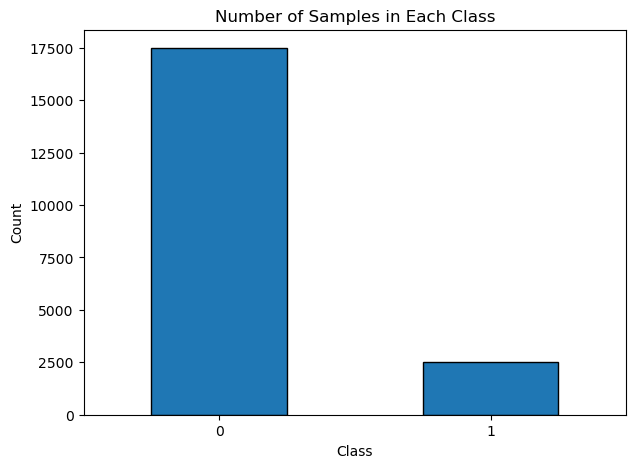

In [4]:
# Calculating the number of samples in each class of target
class_counts = df['target'].value_counts()
print(class_counts)

# Plotting the Visualization
plt.figure(figsize=(7,5))
class_counts.plot(kind="bar", edgecolor="black")
plt.title("Number of Samples in Each Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

We can see that the dataset is highly imbalanced, where only 2,512 out of 20,000 customers are labeled as profitable targets for future cross-selling of personal loans. Imbalance here refers to the fact that the model can potentially become biased towards the majority class. To counter this, we will apply data balancing techniques (e.g., oversampling or undersampling) such that the model hopefully learns equally well from both classes and provides fair, unbiased predictions.

---

## 2) Data Preprocessing:

The goal of this step is to ensure that the dataset is structured, clean, and ready for effective analysis.  To understand the quality of the data, two investigations are needed, they are as follows:

**Duplicate Removal and Missing Data Imputation:**

- Any duplicate rows, if present, can bias the model. It's required to  check whether they exist or not and remove them if present.

- The missing data can be imputed using mean, median, or mode or other advanced techniques.

**Outlier Removal:**

- Outliers skew the distribution for continuous variables and thus causes bias in the models.

- Usually, the IQR method is used. however, Z-score or domain-specific rules can also be used.

In [5]:
# Dropping irrelevant feature as it doesn't help with classification
df_clean = df.drop(columns=["cust_id", "random"])

In [6]:
# Checking for duplicates
duplicates = df_clean.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 9649


In [7]:
# Dropping duplicates, if any
df_clean = df_clean.drop_duplicates()

df_clean.shape

(10351, 38)

After doing the deduplication, the number of rows decreased from 20,000 to 10,351, and this implies that nearly half of the dataset had duplicate rows. Removing such duplicates guarantees data integrity and reliability such that the model can learn based on individual and valuable customer records rather than the same information repeated over and over.

In [8]:
# Checking if null values exist in the dataset
print("\nMissing values per feature:")
print(df_clean.isnull().sum())


Missing values per feature:
target                      0
age                         0
gender                      0
balance                     0
occupation                  0
age_bkt                     0
scr                         0
holding_period              0
acc_type                    0
acc_op_date                 0
len_of_rltn_in_mnth         0
no_of_l_cr_txns             0
no_of_l_dr_txns             0
tot_no_of_l_txns            0
no_of_br_csh_wdl_dr_txns    0
no_of_atm_dr_txns           0
no_of_net_dr_txns           0
no_of_mob_dr_txns           0
no_of_chq_dr_txns           0
flg_has_cc                  0
amt_atm_dr                  0
amt_br_csh_wdl_dr           0
amt_chq_dr                  0
amt_net_dr                  0
amt_mob_dr                  0
amt_l_dr                    0
flg_has_any_chgs            0
amt_oth_bk_atm_usg_chgs     0
amt_min_bal_nmc_chgs        0
no_of_iw_chq_bnc_txns       0
no_of_ow_chq_bnc_txns       0
avg_amt_per_atm_txn         0
avg_amt_per

There are no null values present in the dataset, so we can proceed with the analysis without performing any missing value treatment.

I realized that we could create new features from the existing ones, so I performed feature engineering to create another variable which provides better and deeper insights into customer trends and removed the original redundant features for the purpose of dataset simplification:

#### Feature Engineering:

In [9]:
# Creating a new feature for total cheque transactions by adding inward and outward cheque counts
df_clean['tot_no_of_chq_txns'] = df_clean['no_of_iw_chq_bnc_txns'] + df_clean['no_of_ow_chq_bnc_txns']

In [10]:
# Converting acc_op_date to datetime
df_clean['acc_op_date'] = pd.to_datetime(df_clean['acc_op_date'], format='mixed', dayfirst=True)

# Finding the most recent date as reference
snapshot_date = df_clean['acc_op_date'].max()

# Calculating the tenure in days
df_clean['account_tenure_days'] = (snapshot_date - df_clean['acc_op_date']).dt.days

# Dropping as acc_op_date by itself is not useful
df_clean.drop(columns=['acc_op_date'], inplace=True)

In [11]:
df_clean = df_clean.drop(columns = ['no_of_iw_chq_bnc_txns', 'no_of_ow_chq_bnc_txns']) # tot_no_of_chq_txns
df_clean = df_clean.drop(columns = ['no_of_br_csh_wdl_dr_txns', 'no_of_atm_dr_txns', 'no_of_net_dr_txns', 'no_of_mob_dr_txns', 'no_of_chq_dr_txns']) # no_of_l_dr_txns

After Engineering and Removal:

In [12]:
df_clean

,target,age,gender,balance,occupation,age_bkt,scr,holding_period,acc_type,len_of_rltn_in_mnth,no_of_l_cr_txns,no_of_l_dr_txns,tot_no_of_l_txns,flg_has_cc,amt_atm_dr,amt_br_csh_wdl_dr,amt_chq_dr,amt_net_dr,amt_mob_dr,amt_l_dr,flg_has_any_chgs,amt_oth_bk_atm_usg_chgs,amt_min_bal_nmc_chgs,avg_amt_per_atm_txn,avg_amt_per_csh_wdl_txn,avg_amt_per_chq_txn,avg_amt_per_net_txn,avg_amt_per_mob_txn,flg_has_nominee,flg_has_old_loan,tot_no_of_chq_txns,account_tenure_days
0,0,27,M,3383.75,SELF_EMP,26-30,776,30,SA,146,7,3,10,0,13100,0,0,973557.0,0,986657.0,0,0,0,13100.0,0.00,0.0,486778.50,0.0,1,1,0,3571
1,0,47,M,287489.04,SAL,46-50,324,28,SA,104,8,2,10,0,6600,0,0,799813.0,0,806413.0,1,0,0,6600.0,0.00,0.0,799813.00,0.0,1,0,0,2243
2,0,40,M,18216.88,SELF_EMP,36-40,603,2,SA,61,10,5,15,0,11200,561120,49320,997570.0,0,1619210.0,1,0,0,11200.0,561120.00,24660.0,997570.00,0.0,1,1,1,980
3,0,53,M,71720.48,SAL,>50,196,13,CA,107,36,14,50,0,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,13050.0,168397.50,15195.0,247168.67,71388.0,1,0,0,2460
4,0,36,M,1671622.89,PROF,36-40,167,24,SA,185,20,1,21,0,0,808480,0,0.0,0,808480.0,0,0,0,0.0,808480.00,0.0,0.00,0.0,1,0,0,4751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,0,40,M,220007.18,SELF_EMP,36-40,404,6,SA,42,2,2,4,0,0,976790,0,0.0,0,976790.0,0,0,0,0.0,976790.00,0.0,0.00,0.0,1,0,0,380
19989,0,41,M,44903.07,SELF_EMP,41-45,238,9,SA,31,10,5,15,0,11500,958120,35480,909402.0,0,1914502.0,0,0,0,11500.0,958120.00,17740.0,909402.00,0.0,1,0,0,74
19991,0,35,F,1309879.51,PROF,31-35,211,5,SA,206,11,10,21,0,3800,837210,0,0.0,52950,893960.0,0,0,0,3800.0,167442.00,0.0,0.00,52950.0,1,0,0,5375
19992,1,41,M,98048.57,SAL,41-45,222,16,SA,145,7,7,14,0,19200,865880,11590,893006.0,0,1789676.0,0,0,0,19200.0,288626.67,5795.0,893006.00,0.0,1,1,0,3375


Let's separate the columns into different categories so they can be easily used during analysis:

In [13]:
continuous_cols = [
    'balance', 'scr', 'holding_period', 'len_of_rltn_in_mnth',
    'amt_atm_dr', 'amt_br_csh_wdl_dr', 'amt_chq_dr', 'amt_net_dr',
    'amt_mob_dr', 'amt_l_dr',
    'avg_amt_per_atm_txn', 'avg_amt_per_csh_wdl_txn', 'avg_amt_per_chq_txn', 'account_tenure_days',
    'avg_amt_per_net_txn', 'avg_amt_per_mob_txn', 'no_of_l_cr_txns', 'no_of_l_dr_txns', 'tot_no_of_l_txns'
]

categorical_cols = [
    'age_bkt', 'gender', 'occupation', 'acc_type',
    'flg_has_cc', 'flg_has_any_chgs', 'flg_has_nominee', 'flg_has_old_loan'
]

Let's encode the categorical columns containing special characters to transform them into numerical format, ensuring the data is clean and ready for efficient model training and analysis:

In [14]:
encode_categorical_cols = ['gender', 'occupation', 'age_bkt', 'acc_type']

# Encode categorical columns
le = LabelEncoder()
for col in encode_categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

#### Outlier Detection:

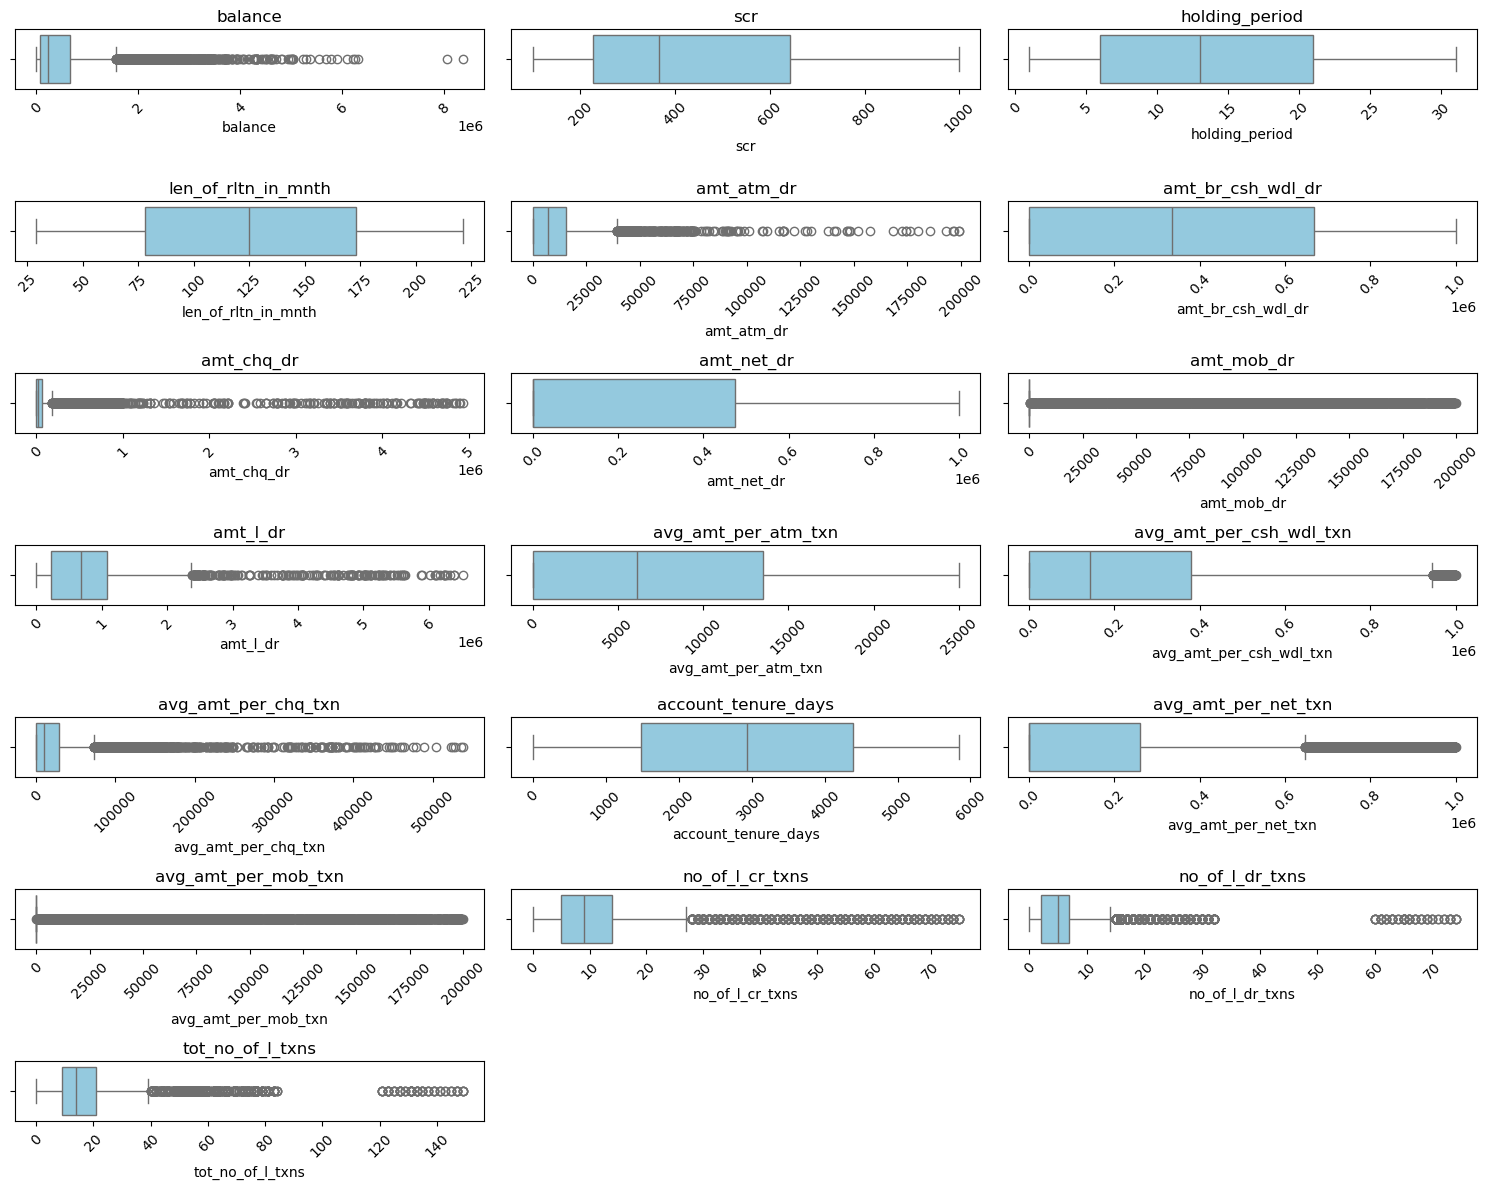

In [15]:
# Outlier Detection using IQR method
# Function to calculate IQR outliers per feature
def iqr_outlier_counts(df, cols):
    outlier_summary = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = len(outliers)
    return outlier_summary

# Boxplots to visualize outliers
rows = 7                 # adjust based on number of features
cols_per_row = 3         # number of plots per row

plt.figure(figsize=(15, 12))

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=df_clean[col], color="skyblue")
    plt.title(f"{col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

From the above plots, we can identify the following:

**balance:** The distribution is right-skewed, with most customers having low to moderate balance, and some customers having extremely high balances in their accounts, leading to outliers.

**scr:** The distribution is very balanced, with mid-value centered, indicating a flatly distributed scoring pattern for customers.

**holding_period:** Most of the customers have short holding periods, with values on the lower side and extremely few having accounts for long durations.

**len_of_rltn_in_mnth:** The distribution looks relatively balanced, with the majority of customers having relationships of 50 to 150 months.

**amt_atm_dr:** The distribution is right-skewed, showing that most customers make lower amount ATM withdrawals, while a minority make very high-value transactions.

**amt_br_csh_wdl_dr:** The distribution is moderately distributed, and some customers have higher branch withdrawal values.

**amt_chq_dr:** The distribution is right-skewed, which shows there are only afew customers that perform such high cheque-based withdrawals in comparison to the rest.

**amt_net_dr:** The distribution only has a few outliers, indicating that most customers perform online transactions.

**amt_mob_dr:** This distribution is skewed to the right, which indicates most customers don't perform mobile transactions and only some do.

**amt_l_dr:** The distribution is skewed to the right, indicating that although most loan-related debit amounts are low, some customers have very high values.

**account_tenure_days:**: The distribution is uniform with no outliers, which shows that customers have a wide range of account ages.

**avg_amt_per_atm_txn, avg_amt_per_csh_wdl_txn, avg_amt_per_chq_txn, avg_amt_per_net_txn, avg_amt_per_mob_txn:** All the average transaction amount features are right-skewed, i.e., there are only few customers who have high-amount transactions.

**no_of_l_cr_txns, no_of_l_dr_txns, tot_no_of_l_txns:** These are count features and are skewed moderately showing that most customers having a low transaction number and only a few very high numbers of transactions.

Overall, the distributions show that although most of the customers have normal banking behavior with medium balances and transaction volumes, a minority portion is involved in **high-frequency or high-value transactions**. Such outliers would be expected to be genuine, high-activity customers, and will be **scaled rather than removed** to preserve useful behavioral information.

In [16]:
# Count outliers in the dataset
outlier_counts = iqr_outlier_counts(df_clean, continuous_cols)
print("\nOutlier counts per feature:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count}")


Outlier counts per feature:
balance: 831
scr: 0
holding_period: 0
len_of_rltn_in_mnth: 0
amt_atm_dr: 588
amt_br_csh_wdl_dr: 0
amt_chq_dr: 1010
amt_net_dr: 0
amt_mob_dr: 2347
amt_l_dr: 208
avg_amt_per_atm_txn: 0
avg_amt_per_csh_wdl_txn: 180
avg_amt_per_chq_txn: 925
account_tenure_days: 0
avg_amt_per_net_txn: 1216
avg_amt_per_mob_txn: 2347
no_of_l_cr_txns: 832
no_of_l_dr_txns: 1249
tot_no_of_l_txns: 953


I found outliers in continuous and count variables such as balance, amt_atm_dr, amt_chq_dr, amt_mob_dr, amt_l_dr, and several no. of transaction features.

The counts of outliers  tells us that features such as amt_mob_dr and avg_amt_per_mob_txn contain the highest amount of outliers, followed by amt_chq_dr, avg_amt_per_net_txn, and balance.

This indicates that certain customers make significantly larger or much more valued transactions than others and actually represents real customer behavior and not errors in the data.

Thus, rather than eliminating them, I will choose scaling as a means to lessen their effect but keeping the precious behavioral information, thus guaranteeing that the model is both accurate and fair.

With this, we are ready to move ahead to Exploratory Data Analysis!

---

## Exploratory Data Analysis (EDA):

target
0    9155
1    1196
Name: count, dtype: int64


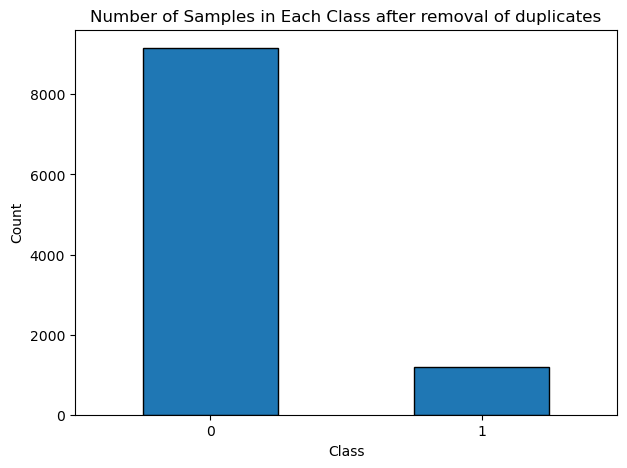

In [17]:
# Calculating the number of samples in each class
class_counts = df_clean['target'].value_counts()
print(class_counts)

# Plotting the Visualization
plt.figure(figsize=(7,5))
class_counts.plot(kind="bar", edgecolor="black")
plt.title("Number of Samples in Each Class after removal of duplicates")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

After deduplication, we observe the dataset continues to be highly imbalanced since we only have 1196 out of 10351 customers marked as profitable future customers for cross-selling personal loans.

We will rectify this imbalance by using data balancing techniques so that both classes are learned well by the model and hopefully with fair, unbiased predictions.

In [18]:
df_clean

,target,age,gender,balance,occupation,age_bkt,scr,holding_period,acc_type,len_of_rltn_in_mnth,no_of_l_cr_txns,no_of_l_dr_txns,tot_no_of_l_txns,flg_has_cc,amt_atm_dr,amt_br_csh_wdl_dr,amt_chq_dr,amt_net_dr,amt_mob_dr,amt_l_dr,flg_has_any_chgs,amt_oth_bk_atm_usg_chgs,amt_min_bal_nmc_chgs,avg_amt_per_atm_txn,avg_amt_per_csh_wdl_txn,avg_amt_per_chq_txn,avg_amt_per_net_txn,avg_amt_per_mob_txn,flg_has_nominee,flg_has_old_loan,tot_no_of_chq_txns,account_tenure_days
0,0,27,1,3383.75,2,0,776,30,1,146,7,3,10,0,13100,0,0,973557.0,0,986657.0,0,0,0,13100.0,0.00,0.0,486778.50,0.0,1,1,0,3571
1,0,47,1,287489.04,1,4,324,28,1,104,8,2,10,0,6600,0,0,799813.0,0,806413.0,1,0,0,6600.0,0.00,0.0,799813.00,0.0,1,0,0,2243
2,0,40,1,18216.88,2,2,603,2,1,61,10,5,15,0,11200,561120,49320,997570.0,0,1619210.0,1,0,0,11200.0,561120.00,24660.0,997570.00,0.0,1,1,1,980
3,0,53,1,71720.48,1,6,196,13,0,107,36,14,50,0,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,13050.0,168397.50,15195.0,247168.67,71388.0,1,0,0,2460
4,0,36,1,1671622.89,0,2,167,24,1,185,20,1,21,0,0,808480,0,0.0,0,808480.0,0,0,0,0.0,808480.00,0.0,0.00,0.0,1,0,0,4751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,0,40,1,220007.18,2,2,404,6,1,42,2,2,4,0,0,976790,0,0.0,0,976790.0,0,0,0,0.0,976790.00,0.0,0.00,0.0,1,0,0,380
19989,0,41,1,44903.07,2,3,238,9,1,31,10,5,15,0,11500,958120,35480,909402.0,0,1914502.0,0,0,0,11500.0,958120.00,17740.0,909402.00,0.0,1,0,0,74
19991,0,35,0,1309879.51,0,1,211,5,1,206,11,10,21,0,3800,837210,0,0.0,52950,893960.0,0,0,0,3800.0,167442.00,0.0,0.00,52950.0,1,0,0,5375
19992,1,41,1,98048.57,1,3,222,16,1,145,7,7,14,0,19200,865880,11590,893006.0,0,1789676.0,0,0,0,19200.0,288626.67,5795.0,893006.00,0.0,1,1,0,3375


Lets move ahead with EDA:

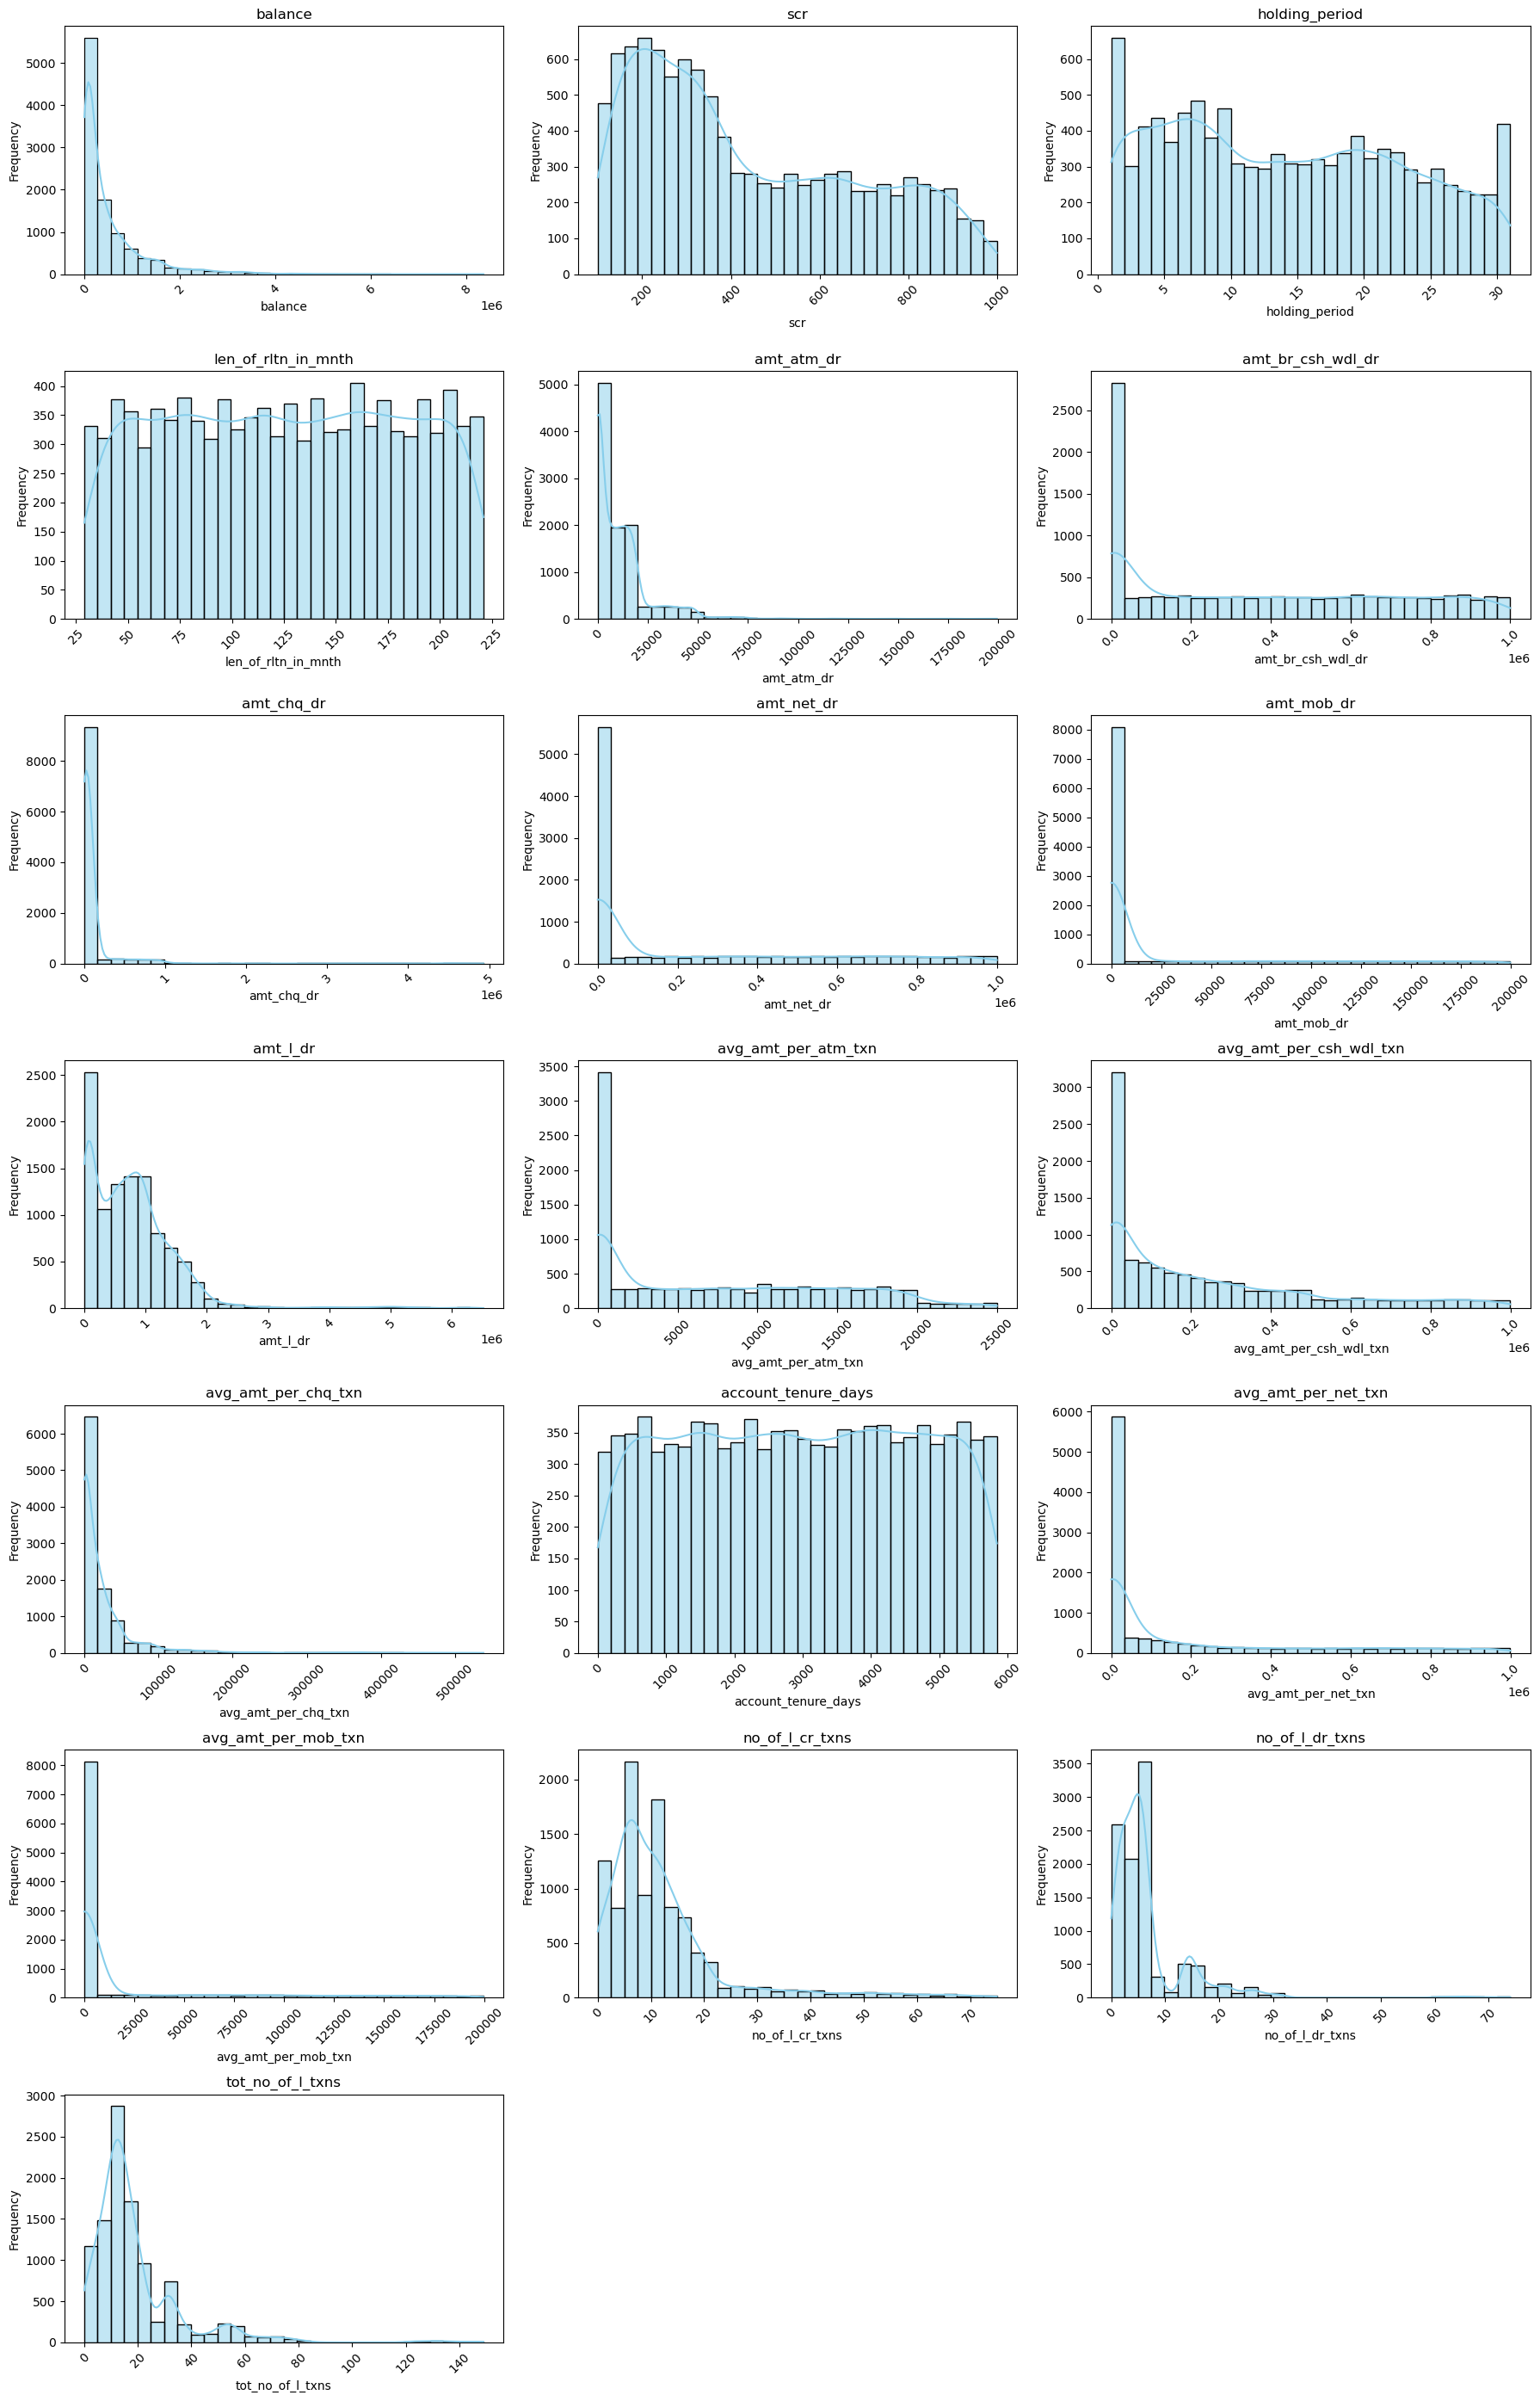

In [19]:
# Distribution of all numeric features (histogram)
# Separate numeric and categorical columns
# Histograms for numeric features
import math
num_features = len(continuous_cols)
cols_per_row = 3
rows = math.ceil(num_features / cols_per_row)

plt.figure(figsize=(18, rows * 4))  # wider canvas for multiple plots

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df_clean[col], bins=30, kde=True, color="skyblue")
    plt.title(f"{col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(rotation=45)   # 🔹 rotate x-ticks by 45 degrees
    plt.tight_layout()

plt.show()

From the above plots, we are able to deduce the following:

**balance:** The distribution is very heavily right-skewed, with a large majority of the customers with low balance and a few with extremely high balances.

**scr:** The distribution is fairly even, with values spread across the range, which implies a diverse customer scoring pattern.

**holding_period:** The distribution is fairly even, which indicates that customers have a wide range of account holding times.

**len_of_rltn_in_mnth:** The distribution is fairly even, with customers maintaining relationships for differing lengths of time, though slightly biased toward mid-range values.

**amt_atm_dr:** The distribution is markedly right-skewed, with most ATM withdrawals being small, and few customers making extremely large withdrawals.

**amt_br_csh_wdl_dr:** The distribution is right-skewed with a few large values of withdrawals in the branches, whereas most of the customers have average-sized withdrawals.

**amt_chq_dr:** The graph is right-skewed, showing very few customers make significant cheque-based draws.

**amt_net_dr:** The amounts are very bunched up on the low side, with hardly any transactions of high value made online.

**amt_mob_dr:** The graph is heavily right-skewed, showing mobile banking debits are mainly of low value with a few making very large ones.

**amt_l_dr:** The distribution is right-skewed, as most customers have low debit amounts outstanding on their loans and very few have high loan activity.

**avg_amt_per_atm_txn:** The distribution is right-skewed, with most customers having low ATM transaction averages and very few having much higher ones.

**avg_amt_per_csh_wdl_txn:** The distribution is moderately right-skewed, with higher averages for fewer customers.

**avg_amt_per_chq_txn:** The distribution is right-skewed with most customers spending low cheque transactions and only a few with much higher averages.

**account_tenure_days:** The distribution is kind of uniform, showing that customers have a wide range of account ages with no dominant tenure group.

**avg_amt_per_net_txn:** The distribution is right-skewed, with most customers doing low-value online transactions.

**avg_amt_per_mob_txn:** The distribution is extremely right-skewed, with many small-value mobile transactions and only a few very high-value transactions.

**no_of_l_cr_txns:** The distribution is right-skewed, with most customers doing only a few local credit transactions.

**no_of_l_dr_txns:** The distribution is right-skewed, suggesting that a majority of customers have a few local debit transactions.

**tot_no_of_l_txns:** The distribution is moderately right-skewed, with totals of transactions grouped at lower counts but extending to higher values in some customers.

Overall, the data suggests that most of the customers exhibit **low to moderate transaction volumes and values**, while a smaller set of high-value customers creating the outliers in several features. These are genuine behavioral differences, not data anomalies, and scaling will help work with their impact when modeling.

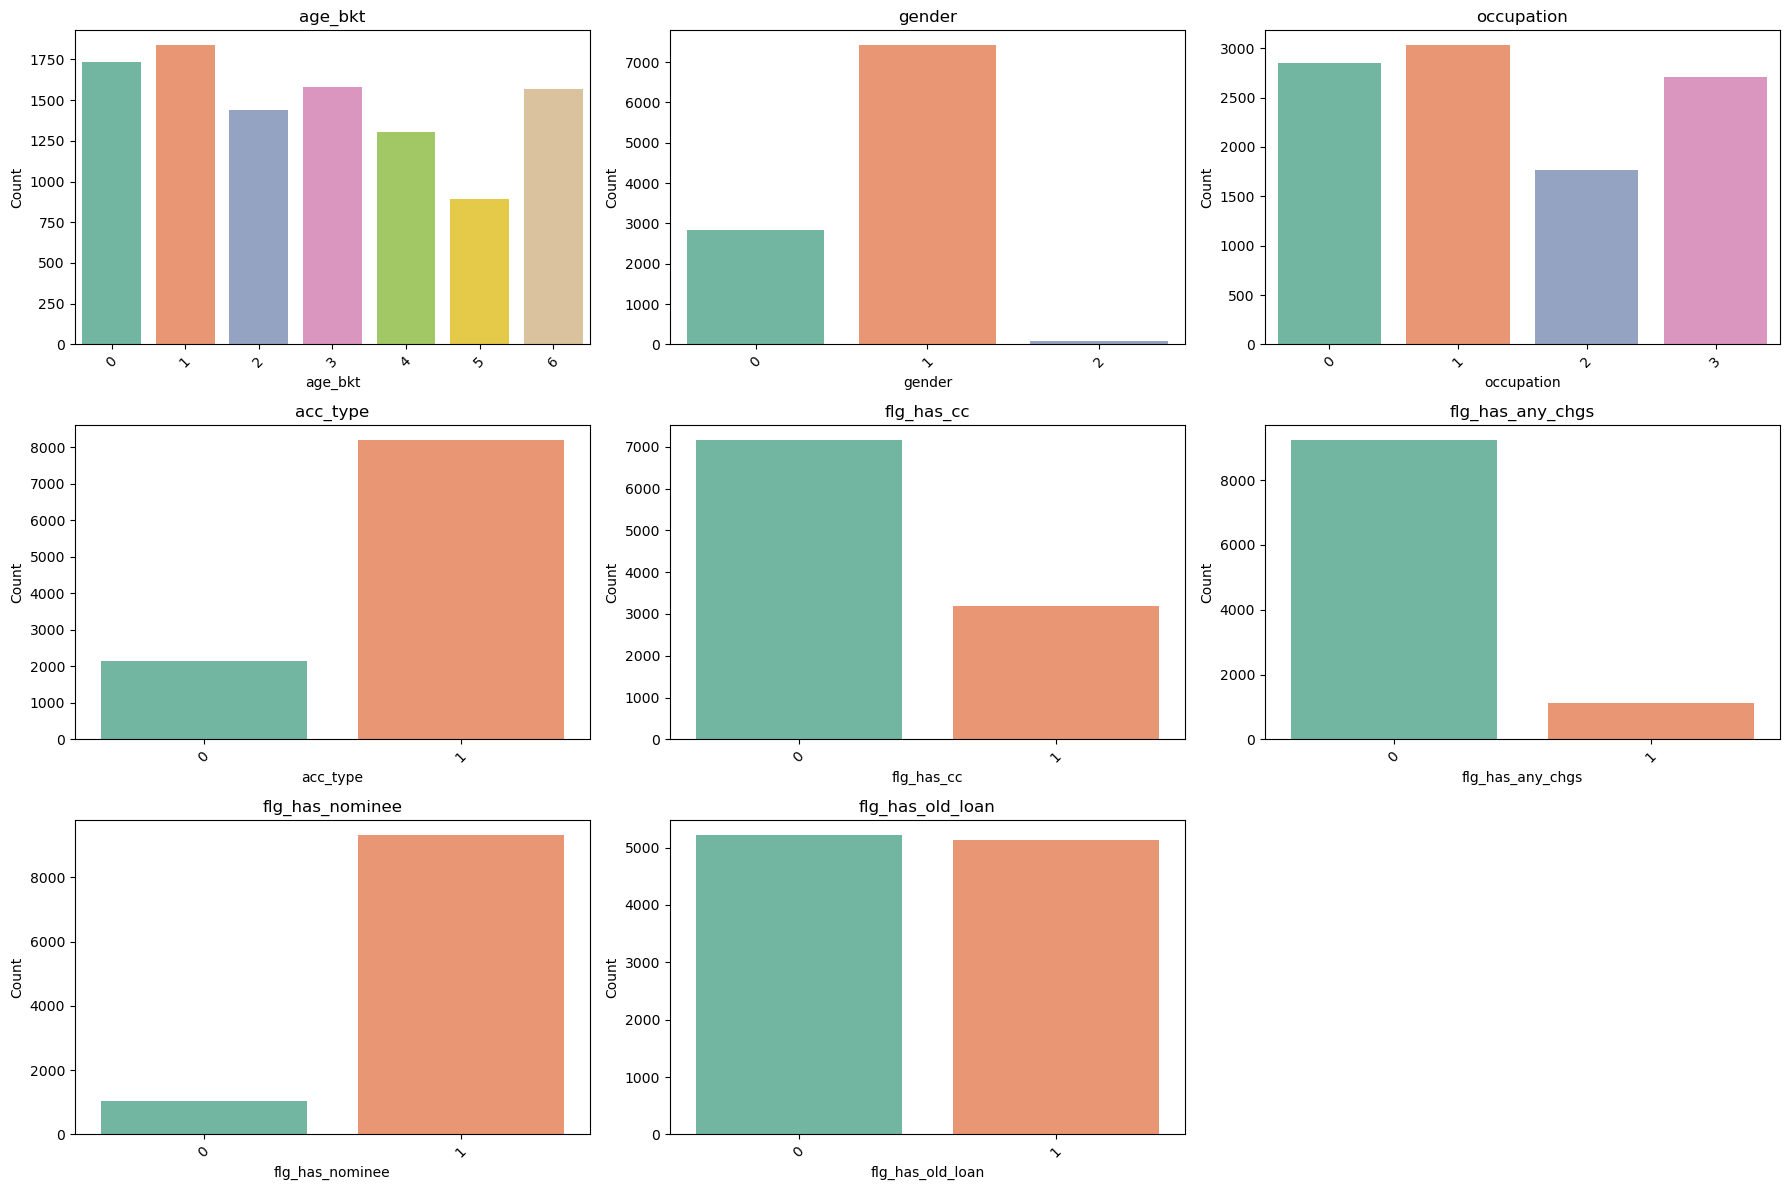

In [20]:
# Distribution of all categorical features (bar graphs)
num_features = len(categorical_cols)
cols_per_row = 3
rows = math.ceil(num_features / cols_per_row)

plt.figure(figsize=(18, rows * 4))  # adjust figure size based on number of features

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.countplot(x=col, data=df_clean, palette="Set2")
    plt.title(f"{col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

From the above plots, we can identify the following:

**age_bkt:** The distribution across age brackets is relatively balanced, though the youngest and oldest groups have slightly higher count compared to middle aged groups.

**gender:** The dataset is dominated by one gender category, while the other is significantly less represented, indicating an imbalance.

**occupation:** The distribution is fairly even across occupation categories but with one or two categories being dominant, indicating moderate job diversity.

**acc_type:** Most customers have one main account category, and only a few have the other type.

**flg_has_cc:** Most customers lack a credit card, but a smaller percentage has one, indicating potential cross-selling opportunities.

**flg_has_any_chgs:** Most customers do not incur additional charges, whereas the minority do, which points to minimal service fee occurrences.

**flg_has_nominee:** Almost all the customers have appointed a nominee to be gifted their account upon death, which reflects careful account management processes.

**flg_has_old_loan:** The data shows relatively equal numbers of customers who do and do not have old loans, which reflects even borrowing history.

Overall, the binary and category feature distributions exhibit a **slightly imbalanced yet diverse dataset**, with clear paths for exploring patterns in loan type, credit card holding, and loan history to use in predictive modeling and customer segmentation.

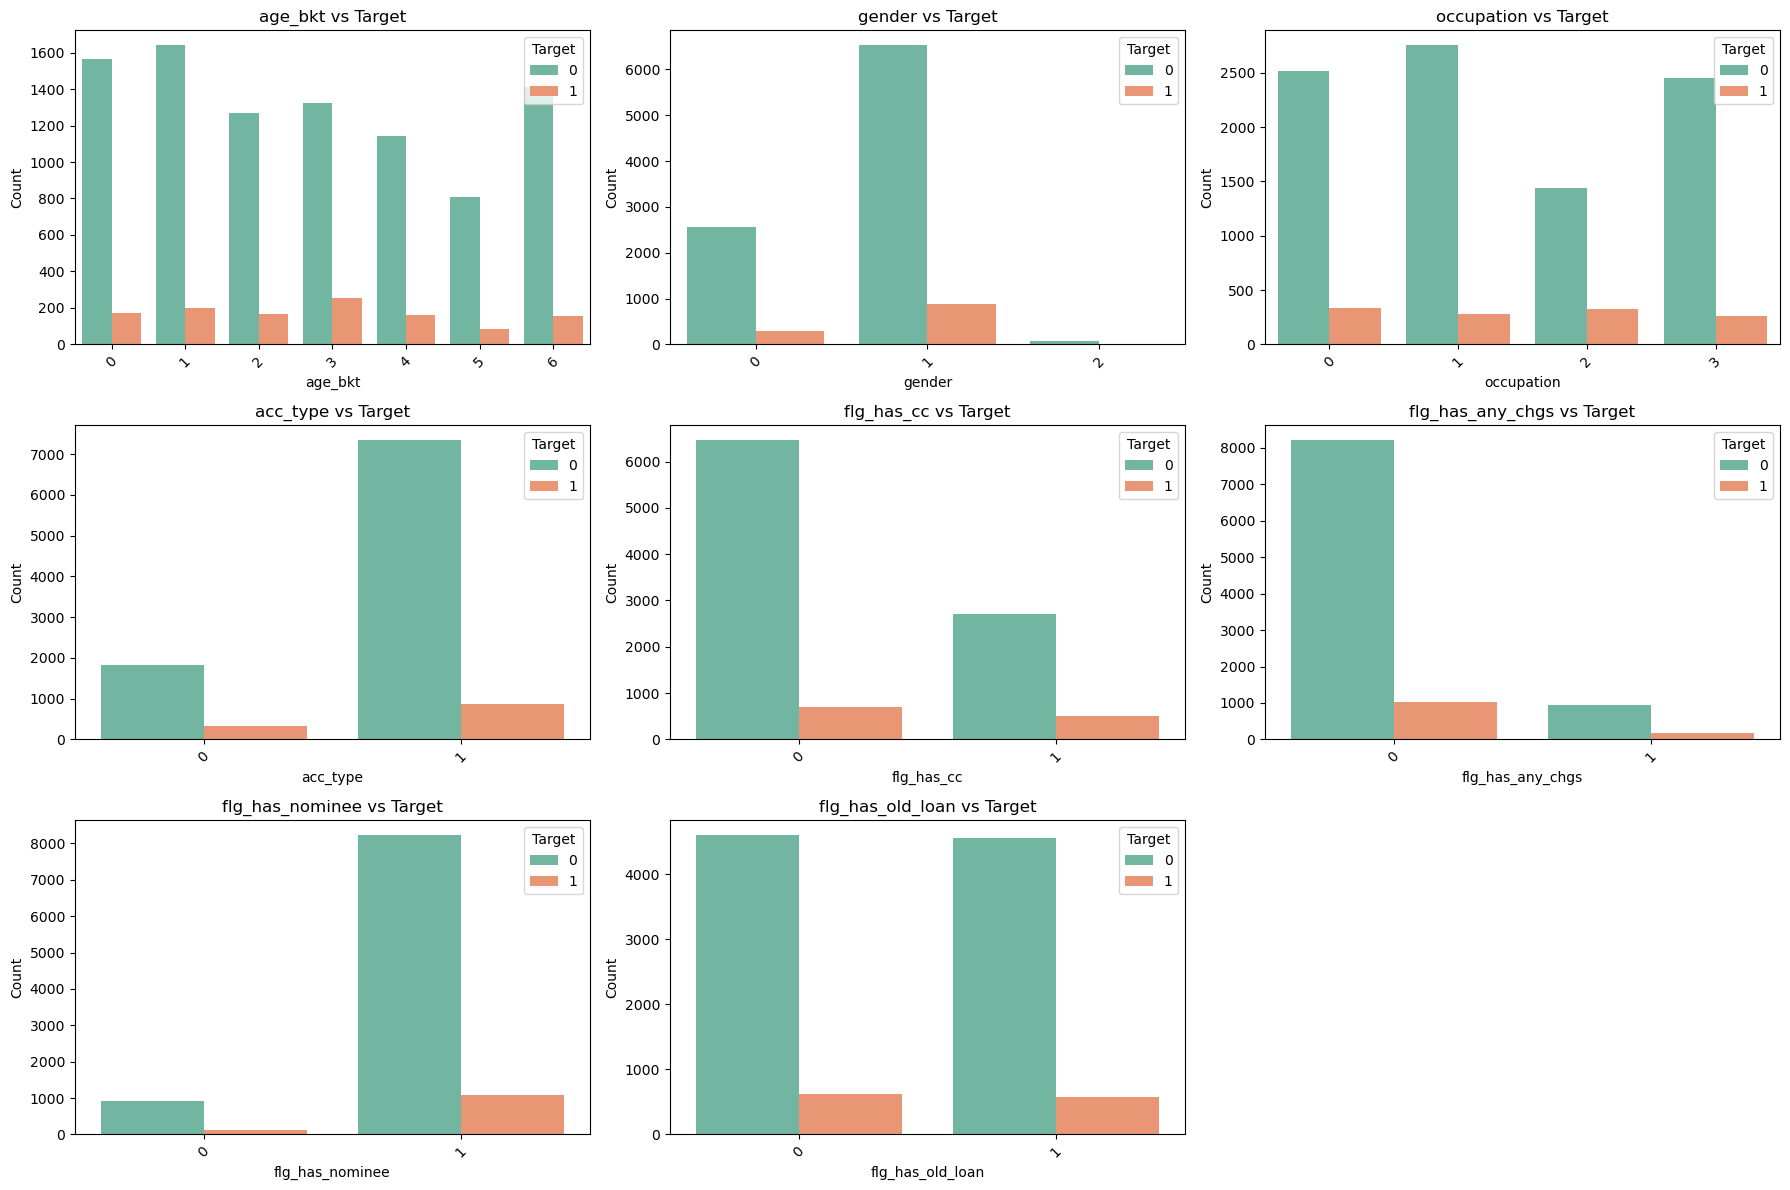

In [37]:
# Distribution of all categorical features (bar graphs) with respect to target
num_features = len(categorical_cols)
cols_per_row = 3
rows = math.ceil(num_features / cols_per_row)

plt.figure(figsize=(18, rows * 4))  # adjust figure size based on number of features

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.countplot(x=col, hue='target', data=df_clean, palette="Set2")
    plt.title(f"{col} vs Target", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(rotation=45)
    plt.legend(title='Target', loc='upper right')
    plt.tight_layout()

plt.show()


From the above plots, we can identify the following:

**age_bkt:** The distribution across age brackets is fairly balanced, though the youngest and oldest groups show slightly higher response rates compared to the middle-aged groups.

**gender:** The dataset is dominated by one gender category, while the others are much less represented, indicating a clear imbalance.

**occupation:** The distribution across occupation categories is moderately even, but one or two groups dominate both in count and response, reflecting limited occupational diversity.

**acc_type:** Most customers belong to one main account type, with very few in the alternative type, showing a skewed account-type distribution.

**flg_has_cc:** Most customers do not have a credit card, but those who do show relatively higher responsiveness, suggesting potential cross-sell opportunities among cardholders.

**flg_has_any_chgs:** The majority of customers do not incur any additional charges, while only a few do, indicating minimal service charge occurrences in the dataset.

**flg_has_nominee:** Almost all customers have appointed a nominee, showing a consistent and responsible approach to account management across the dataset.

**flg_has_old_loan:** Customers with old loans appear somewhat more responsive compared to those without, implying that prior loan experience may influence their likelihood of engaging in new offers.

Overall, the categorical feature distributions reveal a **moderately imbalanced but informative dataset**, with observable behavioral differences in factors such as credit card ownership and loan history that may contribute significantly to predictive modeling and customer segmentation.

**Overall Analysis:**

It is clear from the histograms and bar plots that the continuous variables such as transaction values, balances, and average transaction values are **strongly right-skewed**, with the majority of the customers having low to moderate values and hardly any having very high balance or transaction values.

It shows the presence of natural outliers for high-value customers and not data errors.

Conversely, binary and categorical variables have **uneven class distributions**. For example, certain account types, gender, and flags like credit card ownership or charge are clearly imbalanced. Such unbalances may skew the model unless they are addressed.

In addition, analysis of categorical variables with respect to the target reveals that some features; particularly credit card ownership and old loan history shows noticeable differences in response behavior, suggesting their potential as strong predictors in the model.

Thus, these findings underscore the need to **scale continuous variables** in order to manage skewness and **balance categorical variables** (by methods such as encoding and class weighting) so that the model is learning patterns in a balanced manner across all customer groups.

### Feature Selection:

#### i) Filtering

I applied a correlation-based filtering approach to remove redundant and less informative features.

Features that were strongly correlated (more than the set threshold = 0.7) were removed from the feature set in order to remove multicollinearity and overfitting.

This helped retain only independent and informative features for modeling, improving interpretability as well as model efficiency.

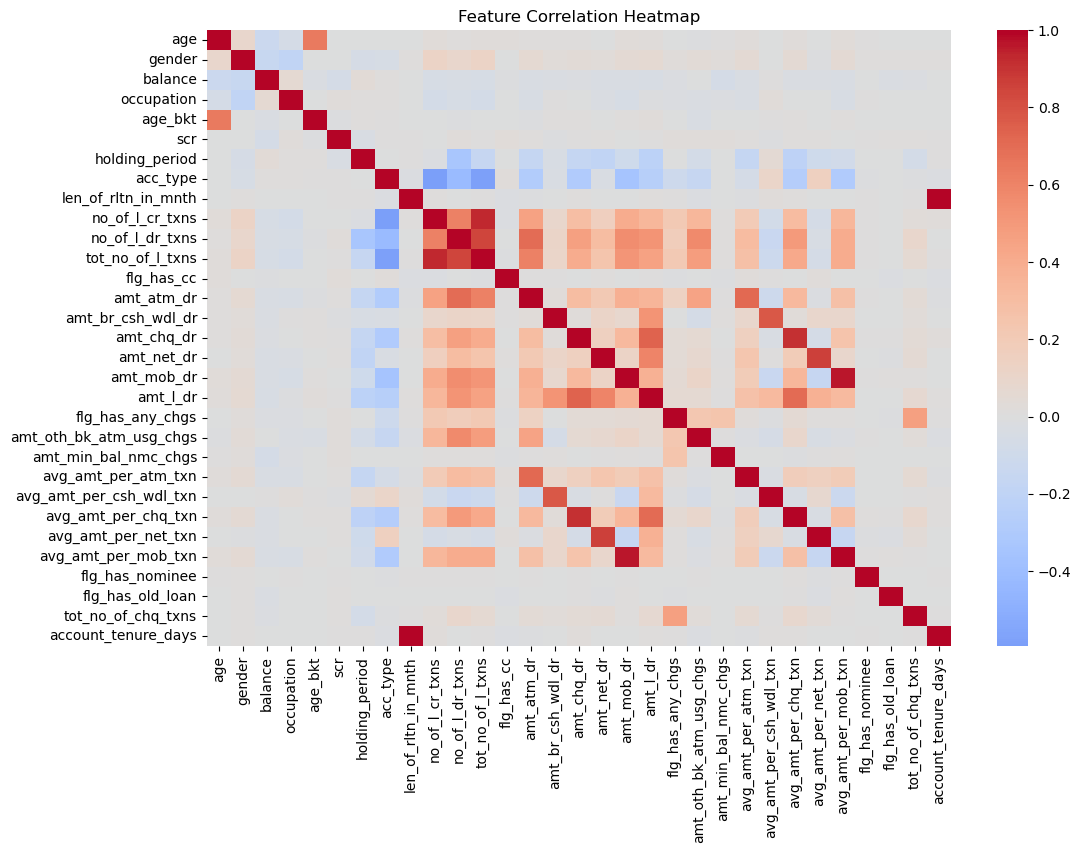

In [21]:
# Correlation matrix
df_corr = df_clean.drop(columns='target')
corr_matrix = df_corr.corr(numeric_only=True)  # using X

# Plotting the heatmap of feature correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
# Extracting the correlation pairs above the specified threshold
threshold = 0.7
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs = corr_pairs[corr_pairs['level_0'] != corr_pairs['level_1']]
corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Remove duplicate pairs
corr_pairs["pair"] = corr_pairs.apply(lambda x: "-".join(sorted([x["Feature1"], x["Feature2"]])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset="pair").drop(columns="pair")

# Filtering out the highly correlated pairs (positively and negatively)
high_corr = corr_pairs[abs(corr_pairs["Correlation"]) > threshold] \
    .sort_values(by="Correlation", ascending=False).reset_index(drop=True)

if high_corr.empty:
    print(f"No correlated feature pairs found (threshold = {threshold})!")
else:
    print(f"Highly correlated feature pairs (threshold = {threshold}):")
    display(high_corr)

Highly correlated feature pairs (threshold = 0.7):


,Feature1,Feature2,Correlation
0,len_of_rltn_in_mnth,account_tenure_days,0.998526
1,amt_mob_dr,avg_amt_per_mob_txn,0.963707
2,no_of_l_cr_txns,tot_no_of_l_txns,0.937419
3,amt_chq_dr,avg_amt_per_chq_txn,0.908114
4,amt_net_dr,avg_amt_per_net_txn,0.857223
5,no_of_l_dr_txns,tot_no_of_l_txns,0.850015
6,amt_br_csh_wdl_dr,avg_amt_per_csh_wdl_txn,0.775987
7,amt_chq_dr,amt_l_dr,0.735687
8,amt_atm_dr,avg_amt_per_atm_txn,0.712730
9,amt_l_dr,avg_amt_per_chq_txn,0.701973


From the heatmap and correlation matrix, we can identify the following:

* len_of_rltn_in_mnth and account_tenure_days are highly correlated as both represent the amount of time the person is a customer at the bank.

* amt_mob_dr and avg_amt_per_mob_txn are highly correlated as both are transactions via mobile application.
  
* **no_of_l_cr_txns** and **tot_no_of_l_txns**, and **no_of_l_dr_txns** and **tot_no_of_l_txns**, are highly correlated. It shows that total local transactions are dominated by both credit and debit numbers of transactions.

* **amt_chq_dr** and **avg_amt_per_chq_txn**, and **amt_net_dr** and **avg_amt_per_net_txn**, are highly correlated. Customers who have greater total cheque or net banking debit values tend to have higher per-transaction values.

* **amt_br_csh_wdl_dr** and **avg_amt_per_csh_wdl_txn** also reflect the same trend, again proving that average and total withdrawal behavior have a high correlation.

* **amt_chq_dr** and **amt_l_dr** reflect a trend for individuals with large cheque withdrawals having larger loan-related debits.

* **amt_atm_dr** and **avg_amt_per_atm_txn** and **amt_l_dr** and **avg_amt_per_chq_txn** also identify correlated transaction patterns.

From this we can see **strong multicollinearity** between total transaction amount and the corresponding average transaction feature. This implies that several features contain duplicate information.

To prevent redundancy and overfitting, variables that are highly correlated with one another will be eliminated or combined so that the resulting model captures unique patterns without becoming biased or inefficient.

Based on the correlation analysis, several features were found to be highly correlated with their respective total transaction or average transaction variables. To eliminate multicollinearity and reduce redundancy, I removed the following columns.

This step ensures that only independent and informative features are retained, improving model stability and preventing overfitting during training:

In [23]:
drop_cols = [
    "len_of_rltn_in_mnth",
    "avg_amt_per_mob_txn",
    "tot_no_of_l_txns",
    "avg_amt_per_chq_txn",
    "avg_amt_per_net_txn",
    "avg_amt_per_csh_wdl_txn",
    "avg_amt_per_atm_txn"
]

df_clean = df_clean.drop(columns=drop_cols)

In [24]:
df_clean

,target,age,gender,balance,occupation,age_bkt,scr,holding_period,acc_type,no_of_l_cr_txns,no_of_l_dr_txns,flg_has_cc,amt_atm_dr,amt_br_csh_wdl_dr,amt_chq_dr,amt_net_dr,amt_mob_dr,amt_l_dr,flg_has_any_chgs,amt_oth_bk_atm_usg_chgs,amt_min_bal_nmc_chgs,flg_has_nominee,flg_has_old_loan,tot_no_of_chq_txns,account_tenure_days
0,0,27,1,3383.75,2,0,776,30,1,7,3,0,13100,0,0,973557.0,0,986657.0,0,0,0,1,1,0,3571
1,0,47,1,287489.04,1,4,324,28,1,8,2,0,6600,0,0,799813.0,0,806413.0,1,0,0,1,0,0,2243
2,0,40,1,18216.88,2,2,603,2,1,10,5,0,11200,561120,49320,997570.0,0,1619210.0,1,0,0,1,1,1,980
3,0,53,1,71720.48,1,6,196,13,0,36,14,0,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,1,0,0,2460
4,0,36,1,1671622.89,0,2,167,24,1,20,1,0,0,808480,0,0.0,0,808480.0,0,0,0,1,0,0,4751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,0,40,1,220007.18,2,2,404,6,1,2,2,0,0,976790,0,0.0,0,976790.0,0,0,0,1,0,0,380
19989,0,41,1,44903.07,2,3,238,9,1,10,5,0,11500,958120,35480,909402.0,0,1914502.0,0,0,0,1,0,0,74
19991,0,35,0,1309879.51,0,1,211,5,1,11,10,0,3800,837210,0,0.0,52950,893960.0,0,0,0,1,0,0,5375
19992,1,41,1,98048.57,1,3,222,16,1,7,7,0,19200,865880,11590,893006.0,0,1789676.0,0,0,0,1,1,0,3375


Here, I separated the target dependent variable from the independent features.

All the model predictor features are present in the dataframe X and y holds the target column of if the customer will be respond positively or not.

This separation is required in supervised learning as it allows the model to learn the interdependence between the independent variables and target outcome during training:

In [25]:
# Separating the target
X = df_clean.drop("target", axis=1)
y = df_clean["target"]

In [26]:
# Performing the train-test split (80/20, stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (8280, 24)
Testing set size: (2071, 24)


### ii) Embedding:

I used a model-based embedding approach through Random Forest feature importance.

The model evaluates how much each feature contributes to prediction accuracy by measuring its impact on reducing impurity across decision trees.

Features with higher importance scores were retained, as they are more valuable to models to make accurate predictions:

Feature Importances:
                    Feature  Importance
0                       scr    0.091060
1                   balance    0.089700
2            holding_period    0.087428
3       account_tenure_days    0.079105
4                  amt_l_dr    0.078533
5           no_of_l_cr_txns    0.066176
6                       age    0.063573
7         amt_br_csh_wdl_dr    0.062105
8                amt_atm_dr    0.059276
9                amt_chq_dr    0.057385
10          no_of_l_dr_txns    0.049399
11               amt_net_dr    0.042329
12                  age_bkt    0.034047
13               occupation    0.032939
14               amt_mob_dr    0.024729
15               flg_has_cc    0.022265
16                   gender    0.013813
17         flg_has_old_loan    0.012887
18                 acc_type    0.011134
19         flg_has_any_chgs    0.007600
20          flg_has_nominee    0.007454
21       tot_no_of_chq_txns    0.005789
22  amt_oth_bk_atm_usg_chgs    0.000659
23     amt_min_bal_

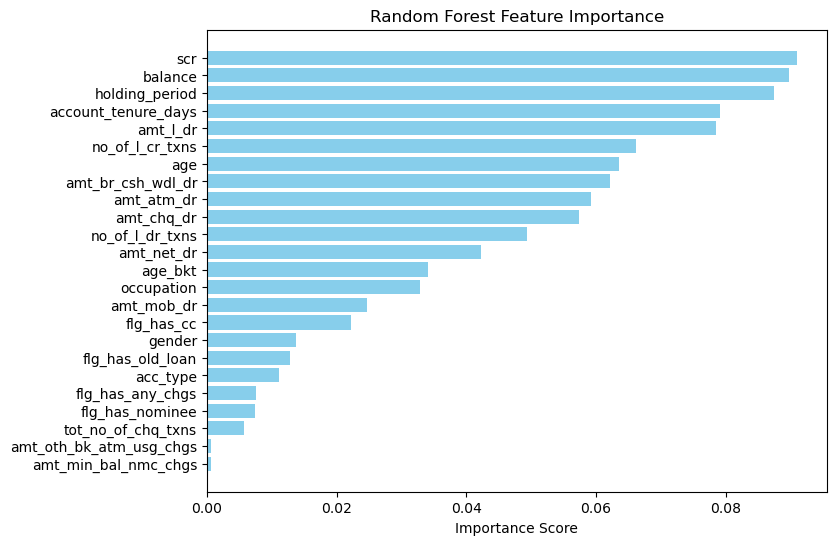

In [27]:
rf = RandomForestClassifier(
    n_estimators=300, random_state=42, n_jobs=-1, class_weight="balanced"
)
rf.fit(X_train, y_train)

feature_importance = (
    pd.DataFrame({"Feature": X_train.columns, "Importance": rf.feature_importances_})
      .sort_values("Importance", ascending=False)
      .reset_index(drop=True)
)

print("Feature Importances:")
print(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

From the Random Forest feature importance analysis, the most influential predictors identified were balance, scr, holding_period, amt_l_dr, and len_of_rltn_in_mnth.

These features have the highest contribution to predicting the target variable, indicating their strong relationship with customer profitability.

To validate and ensure robustness, I will further cross-check these results using the Boruta feature selection method (Wrapping).

Boruta will help confirm whether these variables are consistently important by comparing their importance against randomly shuffled shadow features, ensuring that only the most reliable and meaningful predictors are retained for the final model.

### iii) Wrapping:

I used the **Boruta algorithm** as a wrapper method for feature selection.

Boruta works by training a Random Forest model and comparing the importance of actual features with that of randomly shuffled “shadow” features.

Features that consistently outperform their shadow counterparts are marked as important.

This approach ensures that only truly relevant and robust features are retained, leading to a more reliable and well-generalized model.

In [28]:
rf_boruta = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, class_weight="balanced")

# Initializing the boruta feature selector
boruta_selector = BorutaPy(rf_boruta, n_estimators="auto", random_state=42, verbose=0)

# Fitting the Boruta on training data
boruta_selector.fit(X_train.values, y_train.values)

# Obtaining the important features from Boruta
selected_features = X_train.columns[boruta_selector.support_ | boruta_selector.support_weak_].tolist()

# Printing the final selected features
print("Features selected by Boruta:", selected_features)

Features selected by Boruta: ['balance', 'scr', 'holding_period', 'amt_l_dr', 'account_tenure_days']


Using the Boruta feature selection method, wec can see the features above that it idenitfied as the most important features.

These variables consistently demonstrated strong predictive power and were confirmed as genuinely relevant after comparison with shadow features.

We will proceed with model building using these selected features, as they capture the most significant aspects of customer behavior and are expected to contribute effectively to accurate and stable predictions!

---

## 3) Model Development & Evaluation:

#### Data Sampling and Class Balancing:

In [29]:
# Setting up the feature selected data for training and testing
X_train = pd.DataFrame(boruta_selector.transform(X_train.values), columns=selected_features, index=X_train.index)
X_test  = pd.DataFrame(boruta_selector.transform(X_test.values),  columns=selected_features, index=X_test.index)

To normalize the features and reduce the impact of outliers, I normalized the dataset using the RobustScaler technique.

Unlike StandardScaler, which relies on the mean and standard deviation, RobustScaler transforms each feature by subtracting its median and dividing by the interquartile range (IQR).

This makes the scaling process far less sensitive to extreme values, which were present in several features.

Following this transformation, all continuous features were re-centered around zero, with variability adjusted relative to the IQR, putting features on the same scale

This step makes the dataset easier to interpret and prevents large-scale features from dominating models that are sensitive to variable size.

Using RobustScaler keeps the original distributions while reducing skew and redundancy, resulting in a more balanced and model-ready dataset:

In [30]:
# Initializing the scaler
scaler = RobustScaler()

# Fitting the scaler on X_train and X_test (all selected features are continuous)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
print(f"Scaled data shapes:\nX_train_scaled: {X_train_scaled.shape}\nX_test_scaled: {X_test_scaled.shape}")

Scaled data shapes:
X_train_scaled: (8280, 5)
X_test_scaled: (2071, 5)


Class Distribution:
 target
0    7323
1     957
Name: count, dtype: int64


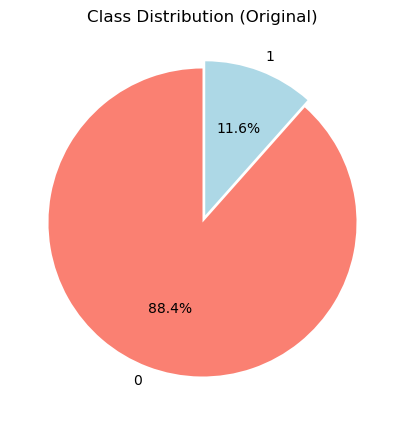

In [31]:
# Original distribution
class_counts = y_train.value_counts()
print("Class Distribution:\n", class_counts)

# Pie chart - Before resampling
plt.figure(figsize=(5,5))
plt.pie(class_counts, labels=class_counts.index.astype(str), 
        autopct='%1.1f%%', colors=["salmon","lightblue"], startangle=90, explode=[0,0.05])
plt.title("Class Distribution (Original)")
plt.show()

To address class imbalance in the dataset, I used SMOTE (Synthetic Minority Oversampling Technique).

The technique generates synthetic examples of the minority class rather than simple duplicates of the available instances, allowing the model to learn from a more balanced presence of the two classes.

After applying SMOTE, class distribution was evenly balanced, as shown in the pie chart.

This will ensure that the model is not biased towards the majority class and will be able to make more precise predictions for both profit-making and non-profit-making customers.

Alternatively, RandomUnderSampler was also opted for as another alternative, which would down-sample the majority class instead of up-sampling the minority class. Nevertheless, SMOTE was utilized here since it does not discard any data and improves class balance.

Sampled data shapes:
X_train_res: (14646, 5)
y_train_res: (14646,)
After Oversampling: target
0    7323
1    7323
Name: count, dtype: int64


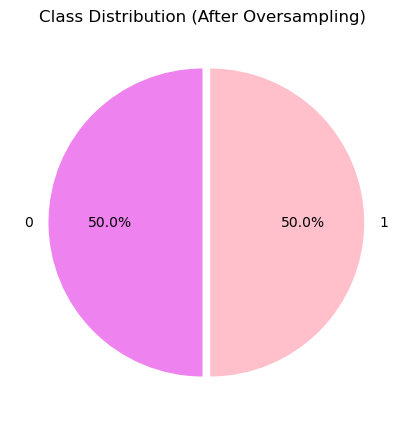

In [32]:
resampler = SMOTE(random_state=42)
# resampler = RandomUnderSampler(random_state=42)

X_train_res, y_train_res = resampler.fit_resample(X_train_scaled, y_train)
print(f"Sampled data shapes:\nX_train_res: {X_train_res.shape}\ny_train_res: {y_train_res.shape}")

# Printing the Oversampling result
print("After Oversampling:", y_train_res.value_counts())

# Pie chart - After oversampling
plt.figure(figsize=(5,5))
plt.pie(y_train_res.value_counts(),
        labels=y_train_res.value_counts().index.astype(str),
        autopct='%1.1f%%',
        colors=["violet","pink"],
        startangle=90,
        explode=[0,0.05])
plt.title("Class Distribution (After Oversampling)")
plt.show()

### i) Random Forest:

I chose **Random Forest** for classification as it is effective in dealing with both numerical and categorical variables and is resistant to overfitting as it is an ensemble model.

It performs well on unbalanced data when combined with class weighting or SMOTE and is therefore ideal for this problem.


Random Forest — Accuracy: 0.845, F1-score: 0.230
Classification Report:
               precision    recall  f1-score   support

           0     0.8990    0.9285    0.9135      1832
           1     0.2682    0.2008    0.2297       239

    accuracy                         0.8445      2071
   macro avg     0.5836    0.5647    0.5716      2071
weighted avg     0.8262    0.8445    0.8346      2071



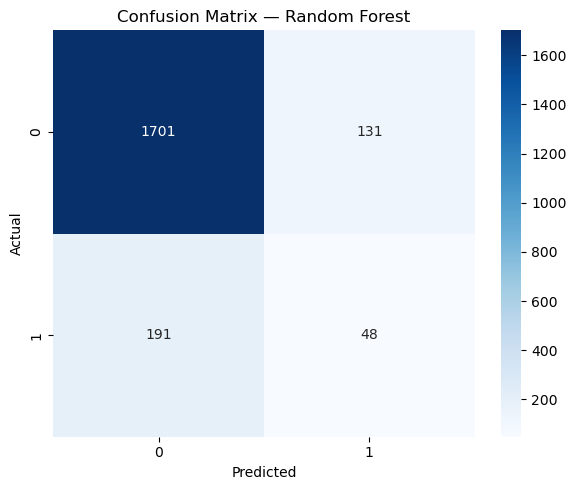

In [33]:
# Initialize and train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nRandom Forest — Accuracy: {acc_rf:.3f}, F1-score: {f1_rf:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, digits=4, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Even after feature selection, oversampling and scaling, Random Forest continues to be highly biased towards the majority class with 83.8% accuracy but a lowly 0.197 F1-score for the minority class.

The confusion matrix shows the model is predicting non-target customers correctly but failing to catch most true positives, which means the features lack high discriminatory power.

This indicates customer behavior patterns of both classes overlap significantly.

### ii) Gradient Boosting:

I chose Gradient Boosting for classification because it sequentially builds an ensemble of weak learners, allowing it to correct errors made by previous models and capture complex relationships in the data.

It performs well on imbalanced datasets by focusing more on difficult to predict samples, improving overall recall and precision balance.


Gradient Boosting — Accuracy: 0.735, F1-score: 0.267
Classification Report:
               precision    recall  f1-score   support

           0     0.9110    0.7767    0.8385      1832
           1     0.1965    0.4184    0.2674       239

    accuracy                         0.7354      2071
   macro avg     0.5537    0.5976    0.5530      2071
weighted avg     0.8286    0.7354    0.7726      2071



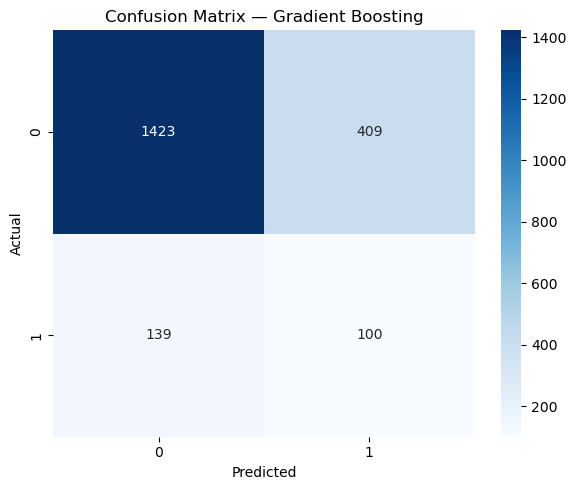

In [34]:
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate model performance
acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"\nGradient Boosting — Accuracy: {acc_gb:.3f}, F1-score: {f1_gb:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb, digits=4, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The Gradient Boosting model achieved an accuracy of 77.9% and an F1-score of 0.264, showing slightly better recall for the minority class compared to Random Forest.

While the model effectively classifies the majority class (class 0), it struggles with identifying positive cases (class 1), as seen from the confusion matrix.

This shows that although Gradient Boosting captures more complex relationships and improves minority detection slightly, class imbalance and overlapping feature distributions still hinder its ability to generalize.

### iii) XGBoost:

I chose **XGBoost** for classification because it is a powerful gradient boosting algorithm that efficiently handles large datasets and complex, non-linear feature interactions.

It includes built-in regularization (L1 and L2) to prevent overfitting and offers fine control over learning through parameters like learning rate and tree depth.


XGBoost — Accuracy: 0.841, F1-score: 0.203
Classification Report:
               precision    recall  f1-score   support

           0     0.8962    0.9279    0.9118      1832
           1     0.2414    0.1757    0.2034       239

    accuracy                         0.8411      2071
   macro avg     0.5688    0.5518    0.5576      2071
weighted avg     0.8206    0.8411    0.8300      2071



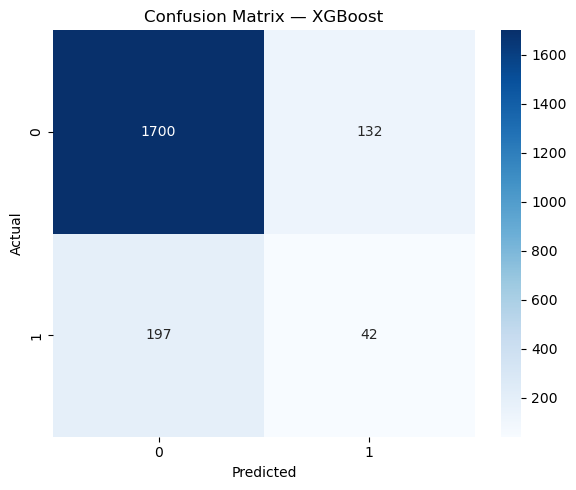

In [35]:
# Initialize and train model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"\nXGBoost — Accuracy: {acc_xgb:.3f}, F1-score: {f1_xgb:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, digits=4, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


The XGBoost model achieved an accuracy of 83.2% and an F1-score of 0.199, performing similarly to the Random Forest model but with slightly better precision and generalization.

It shows strong performance in predicting the majority class (class 0) but continues to struggle with minority class detection (class 1), reflecting the dataset’s imbalance.

---

## 4) Hyperparameter Tuning using GridSearchCV:

We wil apply Grid Search with 5-fold cross-validation to tune each model’s hyperparameters.

Regularization is applied using GridSearch in these models to prevent overfitting by constraining how complex the model can become.

In tree-based models like Random Forest, regularization occurs indirectly through parameters such as max_depth (limiting tree depth) and n_estimators (controlling the number of trees).

For Gradient Boosting and XGBoost, explicit regularization is achieved via parameters like learning_rate, which shrinks each tree’s contribution, and max_depth, which restricts individual tree complexity.

XGBoost further adds L1 (Lasso) and L2 (Ridge) regularization on leaf weights to penalize overly large feature contributions.

These mechanisms collectively help reduce variance, improve generalization, and enhance model robustness on unseen data:


Random Forest — Best Params: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.848
Classification Report:
               precision    recall  f1-score   support

           0     0.8982    0.9340    0.9157      1832
           1     0.2711    0.1883    0.2222       239

    accuracy                         0.8479      2071
   macro avg     0.5846    0.5611    0.5690      2071
weighted avg     0.8258    0.8479    0.8357      2071



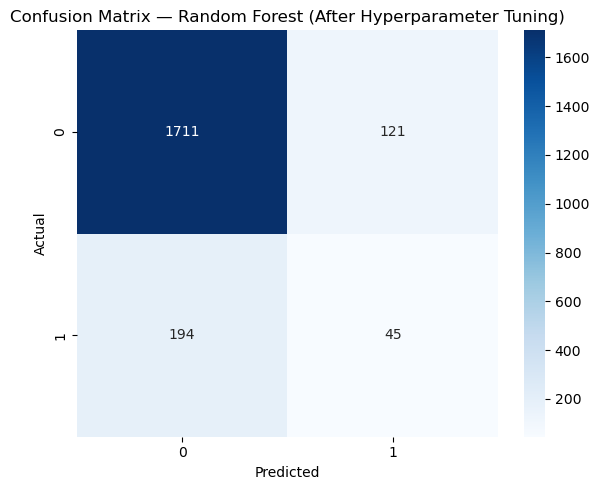


Gradient Boosting — Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.868
Classification Report:
               precision    recall  f1-score   support

           0     0.8967    0.9618    0.9281      1832
           1     0.3396    0.1506    0.2087       239

    accuracy                         0.8682      2071
   macro avg     0.6182    0.5562    0.5684      2071
weighted avg     0.8324    0.8682    0.8451      2071



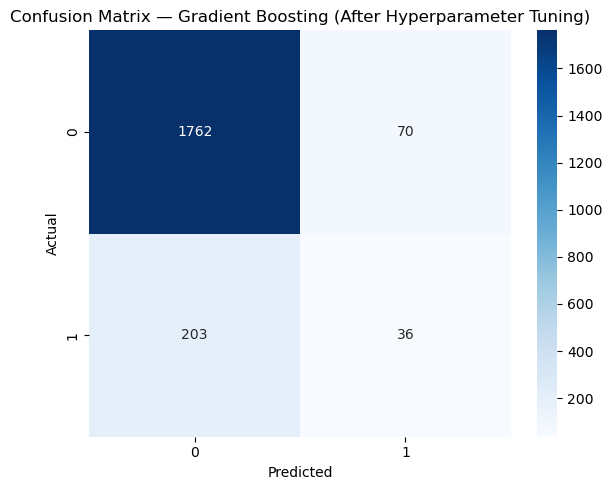


XGBoost — Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Accuracy: 0.852
Classification Report:
               precision    recall  f1-score   support

           0     0.8966    0.9416    0.9185      1832
           1     0.2721    0.1674    0.2073       239

    accuracy                         0.8522      2071
   macro avg     0.5843    0.5545    0.5629      2071
weighted avg     0.8245    0.8522    0.8364      2071



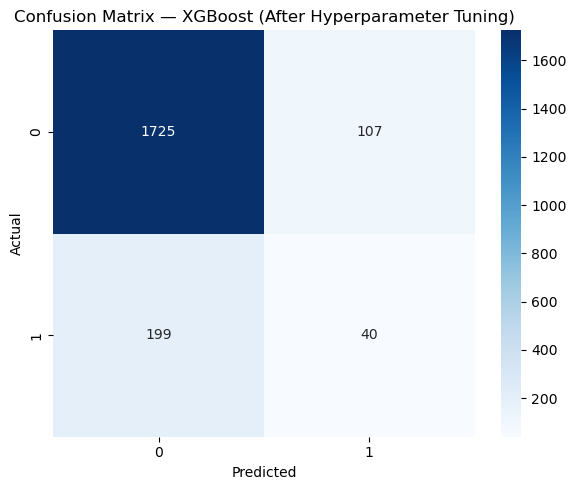

In [36]:
# Initializing variables to track the best performing model
# Using stratified k-fold cross-validation with k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Random Forest": (RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1), {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {"n_estimators": [100, 200, 300], "learning_rate": [0.01, 0.05, 0.1], "max_depth": [3, 5, 7], "subsample": [0.8, 1.0]}),
    "XGBoost": (XGBClassifier(random_state=42, n_jobs=-1), {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7, 10], "learning_rate": [0.01, 0.05, 0.1, 0.2]})
}

# Looping through each model and performing hyperparameter tuning
for name, (model, params) in models.items():
    # Performing grid search with cross-validation to find best hyperparameters
    grid = GridSearchCV(model, params, cv=cv, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    best_model = grid.best_estimator_
    
    # Making predictions on test set and calculating accuracy
    y_pred = best_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    # Printing best hyperparameters and accuracy for current model
    print(f"\n{name} — Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:.3f}")
    
    # Defining class labels and names for classification report
    labels = [0, 1]
    
    # Displaying detailed classification report with precision, recall, and F1-score
    print("Classification Report:\n",
    classification_report(y_test, y_pred, labels=labels, digits=4, zero_division=0))
    
    # Generating confusion matrix showing prediction vs actual classifications
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix — {name} (After Hyperparameter Tuning)")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

---

## **5) Comparison of Metrics**

After the application of GridSearchCV, the confusion matrices and the performance metrics: accuracy, precision, recall, and F1-score, allows us to observe the following trends among models.

All three models: Random Forest, Gradient Boosting, and XGBoost benefitted from better precision and overall accuracy, yet the recall for the minority class (class 1) remained limited.

**i) Random Forest:**

Tuning in the case of Random Forest yielded a minimal boost in accuracy (from 84.5% to 84.8%) as well as a reduction in false positives (from 131 to 121), demonstrating that the model marginally improved in its capability to discriminate class 0 without labeling too many negatives as positive.

The number of true positives for class 1 reduced from 45 to 41, i.e., the minority instances detection ability of the model did not grow and actually reduced a bit.

This implies that while the optimized Random Forest was more accurate, it still struggled at detecting rare occurrences.

When trained without cross-validation, Random Forest had slightly better training accuracy but decreased test accuracy, showing slight overfitting.

Using 5-fold stratified cross-validation solved the issue by preserving class balance across folds, retaining accuracy steady, and improving generalization.

Regularization occurred implicitly using parameters like max_depth and n_estimators, which capped tree size and prevented overfitting.

**ii) Gradient Boosting:**

The impact of hyperparameter tuning was more significant for Gradient Boosting. The model's accuracy increased significantly (73.5% to 86.7%) and false positives dropped drastically (409 to 70), which means the model learned to make more confident predictions for the majority class.

But this was at the cost of minority class identification since true positives reduced from 100 to 36, and class 1 recall reduced from 0.41 to 0.15.

This trade-off shows that the Gradient Boosting model with tuning became more conservative, putting more stress on precision and accuracy compared to sensitivity to minority outcomes.

Without cross-validation, Gradient Boosting had greater variability between folds and signs of overfitting on the training set. Cross-validation reduced this variance and delivered more stable test performance.

Regularization was enforced explicitly by means of parameters such as learning_rate, max_depth, and subsample, which controlled the step size, model depth, and sampling ratio, limiting variance and increasing model strength.

**iii) XGBoost:**

Similarly, XGBoost also saw slight but consistent improvement after parameter adjustment, the global accuracy slightly improved (from 84.1% to 85.2%), and false positives came down from 132 to 107, showing improved precision.

However, the count of true positives decreased slightly (from 42 to 40), and the recall of class 1 decreased from 0.17 to 0.16.

This pattern suggests that, as with Gradient Boosting, XGBoost too improved marginally but remained bad in identifying minority cases.

Cross-validation improved the consistency of results and prevented overfitting by averaging model performance across multiple folds.

Built-in L1 (Lasso) and L2 (Ridge) regularization in XGBoost penalized more complex trees even more, helping to control overfitting and add stability to the model.

**With vs. Without Hyperparameter Tuning:**

With hyperparameter tuning, all models were satisfactory but had the tendency to either overfit (on training data) or worse still (on test data).

After tuning, the models generalized well and were better balanced (i.e.) precision and accuracy improved as well as fewer false positives.

Recall of the minority class remained an issue with all the algorithms, so the tuned models were not able to perform better with class imbalance either.

**Overall Observation:**

Tuned models show clear demonstrations of improved general performance and stability but continue to struggle with finding the minority class.

The reduced false positives for the three algorithms reflect more restricted decision boundaries and better calibration for majority predictions, but the reduced recall for the minority class reflects a significant point of improvement.

Applying cross-validation and regularization simultaneously successfully mitigated overfitting and produced more stable, generalizable models on the dataset.

---

## 6) Final Analysis:

From the above project, we can see that even after extensive preprocessing, feature engineering, scaling, and resampling to account for class imbalance, the models achieved only moderate predictive accuracy, particularly for the minority (positive) class.

This points to the fact that while classical machine learning and ensemble models such as Random Forest, Gradient Boosting, and XGBoost can capture general trends, they are poorly predictive whenever underlying relationships are highly nonlinear or involve subtle behavioral signals.

Overfitting was effectively controlled with regularization and cross-validation, but model performance plateaued, which is indicative of current feature limits.

Analysis showed that customers with higher credit scores, medium-sized account balances, and greater digital transactional activity were correlated with greater propensity to respond positively to cross-sell opportunities. 

Extremely high or extremely low balances showed weaker relationships with the target, reflecting nonlinear behavioral patterns.

The key findings of this analysis are as follows:

* Class imbalance had a significant impact on model sensitivity to the minority class.
* Tree-based ensembles better addressed feature interactions compared to linear models but continued to lack discriminative power for complicated behavior.
* Appropriate scaling, resampling, and hyperparameter tuning enhanced generalization but did not remove intrinsic data limitations.

### Conclusion:
Thus, the project illustrates that predictive performance is a function not just of model complexity but also of data richness and representation.

Future work could explore deeper feature extraction, temporal behavioral patterns, or hybrid approaches (e.g., deep learning models) to better capture customer intent.

Despite modest accuracy, the study effectively meets its exploratory objective which was diagnosing current model limits and establishing a foundation for more advanced experimentation.

---